
# Decision Tree and Random Forest Analysis for Healthcare Cost Prediction
    


This notebook explores the use of Decision Trees and Random Forests for predicting the rank of healthcare costs. These models are powerful tools for capturing non-linear relationships in the data. We will focus on predicting `TOTTCHY1_rank`. 
    


## 1. Data Loading and Preparation
We begin by loading the dataset, selecting the relevant features and the target variable, and preparing the data for our models.
    

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
    
# Load the dataset
df = pd.read_csv('CVD_data2.csv')
    
# Select features and target, and drop rows with missing values
features = ['AGEY1X', 'ADSEX4', 'PRVEVY1', 'DIABDXY1_M18', 'ANGIDXY1', 'ARTHDXY1', 'CHDDXY1', 'MIDXY1', 'total_comorbidities']
target = 'TOTTCHY1_rank'
    
df_model = df[features + [target]].dropna()
    
# Binarize categorical predictors
for col in ['ADSEX4', 'PRVEVY1', 'DIABDXY1_M18', 'ANGIDXY1', 'ARTHDXY1', 'CHDDXY1', 'MIDXY1']:
    df_model[col] = df_model[col].apply(lambda x: 1 if x == 1 else 0)
    
# Define X and y
X = df_model[features]
y = df_model[target]
    
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    


## 2. Decision Tree Regression
First, we'll train a single Decision Tree Regressor to predict the rank of healthcare costs.
    

In [2]:

# Create and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
    
# Make predictions
y_pred_tree = tree_model.predict(X_test)
    
# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
    
print("--- Decision Tree Regressor Performance ---")
print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared: {r2_tree}")
    

--- Decision Tree Regressor Performance ---
Mean Squared Error: 3884072.071208128
R-squared: -0.15471178500972793



## 3. Random Forest Regression
Next, we'll use a Random Forest, which is an ensemble of decision trees, to improve the predictive performance. We will also examine the feature importances provided by the model.
    

--- Random Forest Regressor Performance ---
Mean Squared Error: 3302479.7178050377
R-squared: 0.01819220138236821

Feature Importances:
               Feature  Importance
0               AGEY1X    0.493079
8  total_comorbidities    0.266679
1               ADSEX4    0.081460
2              PRVEVY1    0.078852
5             ARTHDXY1    0.021111
3         DIABDXY1_M18    0.020835
7               MIDXY1    0.015146
6              CHDDXY1    0.013893
4             ANGIDXY1    0.008947


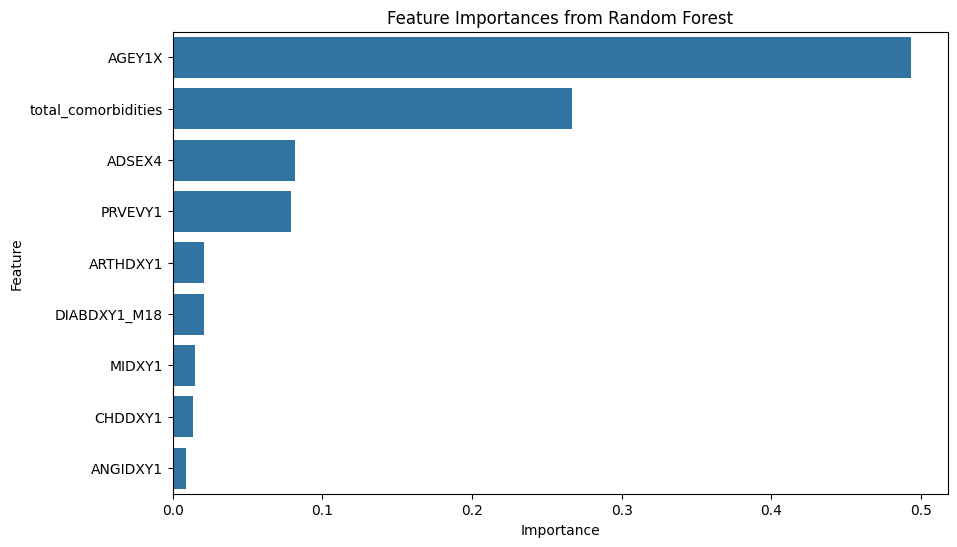

In [4]:

# Create and train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
    
# Make predictions
y_pred_forest = forest_model.predict(X_test)
    
# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
    
print("--- Random Forest Regressor Performance ---")
print(f"Mean Squared Error: {mse_forest}")
print(f"R-squared: {r2_forest}")
    
# Feature Importances
importances = forest_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
print("\nFeature Importances:")
print(feature_importance_df)
    
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.savefig('feature_importances.png')
plt.show()
    


## 4. Conclusion
This notebook demonstrated how to use Decision Tree and Random Forest models for predicting healthcare cost rank.
- The Random Forest model generally provides better performance than a single Decision Tree by reducing overfitting.
- The feature importance plot from the Random Forest model helps us understand which factors are the most influential in predicting healthcare costs. In this case, 'total_comorbidities' and 'AGEY1X' appear to be the most important predictors.
    